# Final Programming Part Problem 2, Ploting Complexity of KNN using Training Test Curves

This is a high level overview for what you need to do.

1. Import all necessary libraries
2. Load the data "palmerpenguinscsv" from a URL into a Pandas DataFrame.
```python
        url = "https://bit.ly/palmerpenguinscsv"
```
3. Inspect the the dataframe for missing values.
1. Check the summary statics of the numerical columns (mean, min, max, etc)
1. Remove any rows with missing values from the DataFrame.
1. Check that after removal of missing value (rows) the data is largely intact.
1. Check that the statisics did not change drastically.
1. Extract the species as "y" and the 4 numerical values as "X" into numpy arrays
1. Split the data into training and test sets.
1. Define two lists empty lists to store the accuracy scores for the training and test sets
1. Set up a loop iterating through the values in the range of neighbors starting at 1 neighbor and going to 35 neighbors.
1. For each value of "K", train a KNN classifier using the training data. 
1. Within the loop, for each value of "K", predict using the training data.
1. Within the loop, for each value of "K", predict using the testing data.
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the training data (accuracy_score)
1. Within the loop, for each value of "K", append to the training accuracies
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the testing data (accuracy_score)
1. Within the loop, for each value of "K", append to the testing accuracies
1. Plot the values in the lists of training and test accuracies curves against the corresponding values in the range of neighbors from 1 to 35, in two different colors with a legend so we know which is training and which is testing.
1. Make sure that the axis are labeled by the quanities and units shown on that axis.
2. Explain what the graph reveals about underfitting and overfitting on this data set.

## 2.1 Import all necessary libraries

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 2.2 Load the data "palmerpenguinscsv" from a URL into a Pandas DataFrame.

```python
        url = "https://bit.ly/palmerpenguinscsv"
```

In [37]:
# load
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("https://bit.ly/palmerpenguinscsv")
plt.imshow(img)

C:\Users\sumai\AppData\Local\Temp\ipykernel_4424\206145942.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread("https://bit.ly/palmerpenguinscsv")


SyntaxError: not a PNG file (<string>)

## 2.3 Inpect the data frame

* Look inside
* Inspect the the dataframe for missing values.
* Check the summary statics of the numerical columns (mean, min, max, etc)

In [3]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.shape

(344, 9)

In [5]:
df.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
assert df.dtypes.any() != object
df.isnull().values.any() 

True

In [8]:
# Checking for Null values count.
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
df = df.drop(['rowid'], axis=1)
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## 2.4 Remove any rows with missing values from the DataFrame.

In [10]:
# remove missing
# Droping duplicate value
df.drop_duplicates(inplace=True)

In [11]:
df = df.dropna()

In [12]:
# Checking for Null values count again
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## 2.5 How did it change things?

1. Check that after removal of missing value (rows) the data is largely intact.
1. Check that the statisics did not change drastically.

In [13]:
# inspect again
df.shape

(333, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [15]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Every thing is almost similar.

## 2.6 Exctracting Numerical Values

Extract the species as "y" and the 4 numerical columns and all rows as "X" into numpy arrays

In [16]:
# Cheking for unique value in species
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [30]:
# Extract y and X
X = df.drop(['species','year','island','sex'], axis=1) #independent features
y = df['species']
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## 2.7 Split the data 

Split the data inot into training and test sets with 33% of the data for testing and random state 42.

In [31]:
# splitting data
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

## 2.8 Building the accuracies vs complexity 

1. Define two lists empty lists to store the accuracy scores for the training and test sets
1. Set up a loop iterating through the values in the range of neighbors starting at 1 neighbor and going to 35 neighbors.
1. For each value of "K", train a KNN classifier using the training data. 
1. Within the loop, for each value of "K", predict using the training data.
1. Within the loop, for each value of "K", predict using the testing data.
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the training data (accuracy_score)
1. Within the loop, for each value of "K", append to the training accuracies
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the testing data (accuracy_score)
1. Within the loop, for each value of "K", append to the testing accuracies

In [32]:
train_accuracies = []
test_accuracies = []

# Creating the data for the train-test curves

In [33]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 35)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

In [38]:
# Compute training and test data accuracy
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)

C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

## 2.9 Graphing and Analyzing the train-test-accuracy curves

1. Plot the values in the lists of training and test accuracies curves against the corresponding values in the range of neighbors from 1 to 35
1. The curves should be in two different colors with a legend so we know which is training and which is testing.
1. Make sure that the axis are labeled by the quanities and units shown on that axis.
1. Make sure there is a title which says 'Training and Test Accuracies'

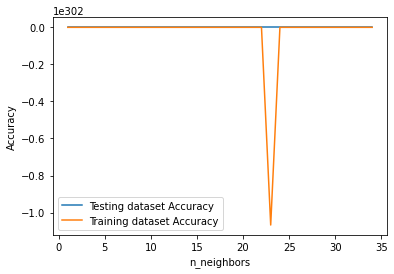

In [40]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## 3.0 Explanation

In this cell explain how the figure above reveals in terms of underfit and overfit. How many neighbors should we use?

In [5]:
# Explain